<a href="https://colab.research.google.com/github/SYWoo02/Engineer_BigData_Analysis_10/blob/main/%5Bpy%5D_T1_1_%EC%9D%B4%EC%83%81%EC%B9%98%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC(IQR%ED%99%9C%EC%9A%A9)_Expected_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')
agileteam_bigdatacertificationkr_path = kagglehub.dataset_download('agileteam/bigdatacertificationkr')

print('Data source import complete.')


Data source import complete.


## 이상치를 찾아라
### 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
- 강의 영상 : https://youtu.be/ipBW5D_UJEo
- 데이터셋 : titanic
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 데이터 위치 "../input/titanic/train.csv" (copy&edit가 아닐 경우 별도로 데이터셋 불러와야 함)

*이탤릭체 텍스트*![440px-Boxplot_vs_PDF.svg.png](attachment:313d91a5-157c-404f-8395-2298413d15e2.png)

In [39]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv("../train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


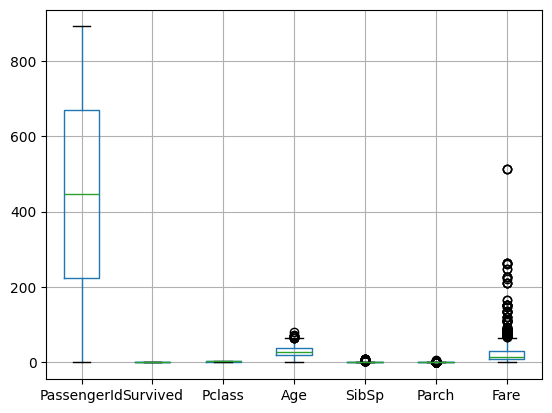

In [40]:
# 간단한 탐색적 데이터 분석 (EDA)
df.boxplot()
print(df.isnull().sum())

In [41]:
# IQR 구하기
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


In [49]:
# 이상치 데이터 구하기
outlier1 = df['Fare'] < (Q1 - IQR * 1.5)
outlier2 = df['Fare'] > (Q3 + IQR *1.5)
oulier_df = df[outlier1 | outlier2]

In [53]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
f = (oulier_df['Sex'] == 'female')
print(sum(f))

70


## Hint

In [ ]:
# IQR 구하기
# pandas 활용
# Q1 = df[col].quantile(.25)
# Q3 = df[col].quantile(.75)

# numpy 활용
# Q1 = np.percentile(df[col], 25)
# Q3 = np.percentile(df[col], 75)

# IQR = Q3 - Q1
# Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

## 해답

In [32]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('../train.csv')

In [33]:
# 간단한 탐색적 데이터 분석 (EDA)
print(df.shape)
print(df.isnull().sum())
df.head()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

# numpy 활용시
# Q1 = np.percentile(df['Fare'], 25)
# Q3 = np.percentile(df['Fare'], 75)

IQR = Q3 - Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(IQR)

23.0896


In [35]:
# 이상치 데이터 구하기
outdata1 = df[df['Fare']<(Q1 - 1.5 * IQR)]
outdata2 = df[df['Fare']>(Q3 + 1.5 * IQR)]
len(outdata1), len(outdata2)

(0, 116)

In [46]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outdata2['Sex'] == 'female'))

70
